In [18]:
import pandas as pd
import numpy as np

import os, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [19]:
df = pd.read_csv("data/stock_data.csv")
df.head()

,High,Low,Open,Close,Volume,Adj Close,Ticker
0,149.729996,148.490005,149.360001,148.850006,56094900.0,148.443954,AAPL
1,153.169998,149.720001,149.820007,152.570007,100077900.0,152.153809,AAPL
2,149.940002,146.410004,147.220001,149.800003,124953200.0,149.391357,AAPL
3,149.699997,147.800003,148.990005,148.960007,74588300.0,148.553650,AAPL
4,151.570007,148.649994,148.660004,150.020004,69122000.0,149.610764,AAPL


In [20]:
df1=df.reset_index()['Close']
df1

0     148.850006
1     152.570007
2     149.800003
3     148.960007
4     150.020004
         ...    
95    155.089996
96    159.589996
97    160.619995
98    163.979996
99    165.380005
Name: Close, Length: 100, dtype: float64

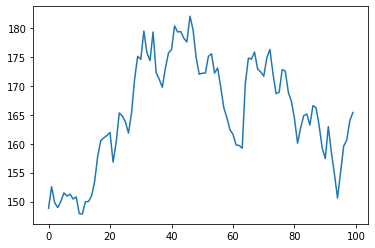

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(len(df1))

100


In [24]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(65, 35)

In [25]:
train_data

array([[0.02870565],
       [0.13766878],
       [0.05653216],
       [0.0319277 ],
       [0.06297625],
       [0.10603428],
       [0.09051001],
       [0.09988294],
       [0.07527848],
       [0.08611607],
       [0.00146465],
       [0.        ],
       [0.06209755],
       [0.0623903 ],
       [0.09168146],
       [0.16461659],
       [0.29291155],
       [0.37141207],
       [0.38517895],
       [0.39660248],
       [0.41212676],
       [0.26186299],
       [0.36233189],
       [0.51054506],
       [0.49502078],
       [0.46543643],
       [0.40919747],
       [0.51113101],
       [0.68277674],
       [0.79701251],
       [0.78178099],
       [0.92501472],
       [0.81634478],
       [0.77504415],
       [0.92062122],
       [0.71441124],
       [0.68160529],
       [0.64089061],
       [0.73579411],
       [0.81341549],
       [0.83216181],
       [0.95079107],
       [0.92032802],
       [0.92296457],
       [0.88840077],
       [0.86994765],
       [1.        ],
       [0.932

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(54, 10)
(54,)
(24, 10)
(24,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=10,verbose=1)

Epoch 1/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0313 - val_loss: 0.0469
Epoch 2/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0311 - val_loss: 0.0366
Epoch 3/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0309 - val_loss: 0.0355
Epoch 4/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0308 - val_loss: 0.0505
Epoch 5/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0302 - val_loss: 0.0338
Epoch 6/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0322 - val_loss: 0.0248
Epoch 7/25
6/6 [==============================] - 0s 24ms/step - loss: 0.0300 - val_loss: 0.0452
Epoch 8/25
6/6 [==============================] - 0s 33ms/step - loss: 0.0313 - val_loss: 0.0437
Epoch 9/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0321 - val_loss: 0.0299
Epoch 10/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0308 - val_loss: 0.0437
Epoch 11/25
6/6 [============

In [44]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.764654017249

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

166.26632555926673

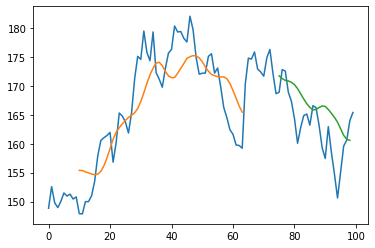

In [49]:
### Plotting
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
len(test_data)

35

In [55]:
x_input=test_data[10:].reshape(1,-1)
x_input.shape

(1, 25)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

25

In [67]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=25
i=0
while(i<10):

    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.28140718]
26
1 day input [0.72290593 0.61540744 0.56912737 0.48183985 0.35735244 0.43555977
 0.49736413 0.50527242 0.44903345 0.54745175 0.53778562 0.44815475
 0.33479813 0.28031656 0.44171066 0.31195106 0.20093734 0.08055068
 0.21148217 0.34329237 0.37346222 0.47188052 0.5128884  0.25071999
 0.28140718]
1 day output [[0.30358317]]
2 day input [0.61540744 0.56912737 0.48183985 0.35735244 0.43555977 0.49736413
 0.50527242 0.44903345 0.54745175 0.53778562 0.44815475 0.33479813
 0.28031656 0.44171066 0.31195106 0.20093734 0.08055068 0.21148217
 0.34329237 0.37346222 0.47188052 0.5128884  0.25071999 0.28140718
 0.30358317]
2 day output [[0.3179909]]
3 day input [0.56912737 0.48183985 0.35735244 0.43555977 0.49736413 0.50527242
 0.44903345 0.54745175 0.53778562 0.44815475 0.33479813 0.28031656
 0.44171066 0.31195106 0.20093734 0.08055068 0.21148217 0.34329237
 0.37346222 0.47188052 0.5128884  0.25071999 0.28140718 0.30358317
 0.3179909 ]
3 day output [[0.32616645]]
4 day input [0.4818398

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [80]:
len(df1)

100

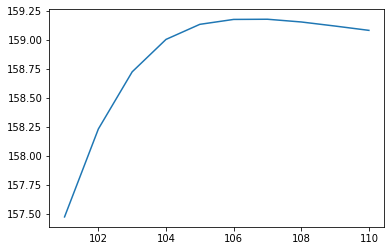

In [87]:
plt.plot(day_new,scaler.inverse_transform(df1[100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))